processed the batch 1
processed the batch 2
processed the batch 3
processed the batch 4
processed the batch 5
processed the batch 6
processed the batch 7
processed the batch 8
processed the batch 9
processed the batch 10
processed the batch 11
processed the batch 12
processed the batch 13
processed the batch 14
processed the batch 15
processed the batch 16
processed the batch 17
processed the batch 18
processed the batch 19
processed the batch 20
processed the batch 21
processed the batch 22
processed the batch 23
processed the batch 24
processed the batch 25
processed the batch 26
processed the batch 27
processed the batch 28
processed the batch 29
processed the batch 30
processed the batch 31
processed the batch 32
processed the batch 33
processed the batch 34
processed the batch 35
processed the batch 36
processed the batch 37
processed the batch 38
processed the batch 39
processed the batch 40
processed the batch 41
processed the batch 42
processed the batch 43
processed the batch 

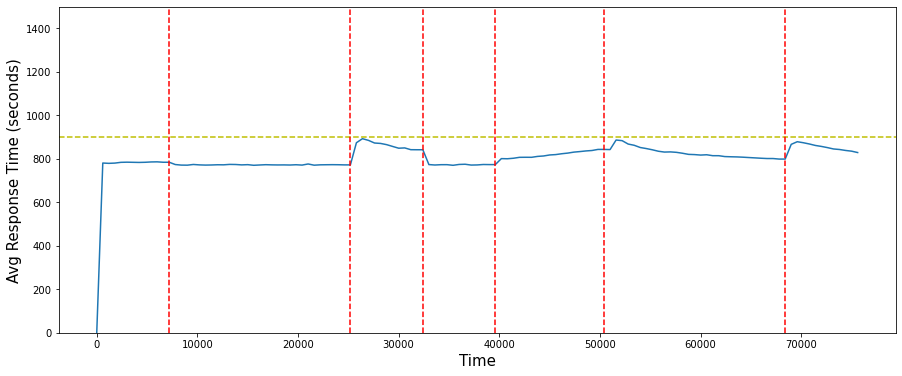

<Figure size 432x288 with 0 Axes>

the average taking of a day at McDonald in Via Tuscolana is 15028.226409894802

the average loss percentage of a day at McDonald in Via Tuscolana is 0.4232758047164095 %


the average utilization of the servers present in the nodes during the time slot 08:00 - 10:00 is:

  cash register         kitchen               table                delivery
     0.0825263            0.1587013             0.4870532           0.1204271


the average utilization of the servers present in the nodes during the time slot 10:00 - 15:00 is:

  cash register         kitchen               table                delivery
     0.2701220            0.2805944             0.4009451           0.0937620


the average utilization of the servers present in the nodes during the time slot 15:00 - 17:00 is:

  cash register         kitchen               table                delivery
     0.0878822            0.1808721             0.6388023           0.2535163


the average utilization of the servers present in the nodes 

In [1]:
from ipynb.fs.full.rngs import plantSeeds, selectStream, random
from ipynb.fs.full.rvms import cdfNormal,idfNormal, idfStudent
from colorama import Fore, Style, Back
from math import log,exp,fabs, sqrt
import statistics
from matplotlib import pyplot as plt
from welford import Welford
import numpy as np

###########################seed = 123456789
#seed = 365676778
#seed = 222222222
seed = 251119942

centers = [0,2,3,5,2]

k=[7200,7200,7200,7200]
timer=[0,7200,25200,32400, 39600, 50400, 68400]
time=[7200,25200,32400,39600,50400,68400]
NODES=4
TINY = 1.0e-10
SQRT2PI = 2.506628274631  # #/* sqrt(2 * pi) */

LAMBDA1LOW=0.0036603
LAMBDA1MID=0.0122984
LAMBDA1HIGH=0.0512456

LAMBDA2LOW=0.000208
LAMBDA2MID=0.000667
LAMBDA2HIGH=0.008271

LAMBDA3LOW=0.0004067
LAMBDA3MID=0.0030746
LAMBDA3HIGH=0.0219624

NUM1LOW=0.8560665
NUM1MID=0.766760
NUM1HIGH=0.6289318

NUM2LOW=0.048815
NUM2MID=0.041550
NUM2HIGH=0.101526

NUM3LOW=0.0951185
NUM3MID=0.191690
NUM3HIGH=0.2695422


PRICE=10
SUPP_DV=2
SUPP_APP=1
BATCH=128
PHASES=7
MAXIMUM=10000000

CASS=1
KITCHEN=2
TABLE=3
DELIVERY=4

START =   0.0                    # initial (open the door)        */
STOP  =   75600.0                # secondi delle 21 ore del mcDonald */
SCREENSHOT=600
SLOT=126
arrivalTemp = [START for x in range(NODES+1)]


sumpar = [0.0 for x in range(NODES)]
difpar = [0.0 for x in range(NODES)]

num=[NUM1LOW, NUM2LOW,NUM3LOW, NUM1MID, NUM2MID,NUM3MID, NUM1HIGH, NUM2HIGH,NUM3HIGH]

b=0
ce=0
sem=0
cass=0
roh=[]
delivery=[]
deliv=0
aux=0
delivaux=0
flag=0
wf=[]
w=[]
ausilArray= []
uscita=0
arriveControl=[0.0,0.0,0.0]
route=0
conteggio=0
memory=0
contatore=0
average=0
activeCenters=0
average_dv=0
activeCenters_dv=0
average_app=0
activeCenters_app=0
priorityArray_dv=[]
priorityArray_app=[]
utenti_dv=0
utenti_app=0
perduti=0
popolazione=0


class TypeNode:
    id= None
    ev= None
    servers=0.0
    index=None
    sum=0.0
    price=0
    number= 0.0
    partialsum=0.0 #variabile del nodo
    area=0.0
    flow=None
    lamb=0.0
    string= None
    last_service=0.0
    f=1
    active=0.0
    lambda3=0.0
    p=None
    
    
    def __init__(self, id_node):
        self.id = id_node
        self.ev = Event()
        self.index = AccumSum()
        self.flow= Time()
        self.string = String()
        self.pretruncservice=[]
        self.posttruncservice=[]
        self.allpostservice=[]
        self.readytodelete=[]
        self.readytodelete_dv=[]
        self.readytodelete_app=[]
        self.p = Priority()
        

class String:
    first= None
    second = None        

class Event:
    t = 0.0 #next event time
    x =None  #event status, 0 or 1
    last= 0.0
    dv=0

class Time:
    current = None          # current time                       */
    next = None             # next (most imminent) event time    */

class AccumSum:
    id= None                      # accumulated sums of                */
    service =0.0          #   service times                    */
    served = 0.0           #   number served                    */
    startserv = 0.0
    endserv = 0.0
    partialservice=0.0
    partialserved=0.0 #variabile del server
    postservice=0.0
    preservice=0.0
    service_dv =0.0
    served_dv = 0
    service_app =0.0
    served_app = 0
    
class Data:
    
    node=None
    event=None
    verify=0
    
class Priority:
    prior = 0
    number_dv = 0
    area_dv = 0
    next_dv =0.0
    current_dv = 0.0
    queue_dv = 0
    sum_dv = 0
    number_app = 0
    area_app = 0
    next_app =0.0
    current_app = 0.0
    queue_app = 0
    sum_app = 0
          

for i in range(SLOT):
    wf.append(Welford())
    
for i in range(PHASES):
    w.append(Welford())
    
w_dv=Welford()
w_app=Welford()
wp=Welford()


#####funzioni per i print ####################à
def PriorityPrint1(node, current_for_update,division):
    
    print("\nfor {0:1f} delivery piority jobs the service node statistics are:\n".format(node.p.sum_dv))
    print("  avg interarrivals .. = {0:6.7f}".format(current_for_update /node.p.sum_dv))
    print("  avg wait ........... = {0:6.7f}".format(node.p.area_dv /division))
    print("  avg # in node ...... = {0:6.7f}".format(node.p.area_dv / current_for_update))
                
def PriorityPrint2(node, current_for_update, division):
    
    global average_dv, activeCenters_dv

    print("  avg delay .......... = {0:6.7f}".format(node.p.area_dv /division))
    print("  avg # in queue ..... = {0:6.7f}".format(node.p.area_dv /  current_for_update))
    print("  avg service time.....= {0:6.7f}".format(average_dv/activeCenters_dv)) 

def Priority2Print1(node, current_for_update, division):
    
    global priorityArray
    
    print("\nfor {0:1f} application piority jobs the service node statistics are:\n".format(node.p.sum_app))
    print("  avg interarrivals .. = {0:6.7f}".format(current_for_update /node.p.sum_app))
    print("  avg wait ........... = {0:6.7f}".format(node.p.area_app / division))
    print("  avg # in node ...... = {0:6.7f}".format(node.p.area_app / current_for_update))
                
def Priority2Print2(node, current_for_update,division):
    
    global average_app, activeCenters_app
    
    print("  avg delay .......... = {0:6.7f}".format(node.p.area_app / division))
    print("  avg # in queue ..... = {0:6.7f}".format(node.p.area_app /  current_for_update))
    print("  avg service time.....= {0:6.7f}".format(average_app/activeCenters_app)) 
        
    
##funzioni per la coda prioritaria

def PriorityArea(node, n, e):
    if node.p.number_dv == 0 and n==2 and arriveControl[2]==0:
        node.p.current_dv = node.p.next_dv    
    node.p.area_dv += ( node.p.next_dv - node.p.current_dv)*node.p.number_dv
    
    node.p.current_dv = node.p.next_dv 

def Priority2Area(node, n, e):
    if node.p.number_app == 0 and n==2 and arriveControl[2]==1:
        node.p.current_app = node.p.next_app    
    node.p.area_app += ( node.p.next_app - node.p.current_app)*node.p.number_app
    
    node.p.current_app = node.p.next_app     



def Exponential(m):
# ---------------------------------------------------
# * generate an Exponential random variate, use m > 0.0 
# * ---------------------------------------------------
# */
  return (-m * log(1.0 - random()))


def Normal(m, s):
    # ========================================================================
    # Returns a normal (Gaussian) distributed real number.
    # NOTE: use s > 0.0
    #
    # Uses a very accurate approximation of the normal idf due to Odeh & Evans,
    # J. Applied Statistics, 1974, vol 23, pp 96-97.
    # ========================================================================
    #
    p0 = 0.322232431088
    q0 = 0.099348462606
    p1 = 1.0
    q1 = 0.588581570495
    p2 = 0.342242088547
    q2 = 0.531103462366
    p3 = 0.204231210245e-1
    q3 = 0.103537752850
    p4 = 0.453642210148e-4
    q4 = 0.385607006340e-2

    u = random()
    if (u < 0.5):
        t = sqrt(-2.0 * log(u))
    else:
        t = sqrt(-2.0 * log(1.0 - u))

    p = p0 + t * (p1 + t * (p2 + t * (p3 + t * p4)))
    q = q0 + t * (q1 + t * (q2 + t * (q3 + t * q4)))

    if (u < 0.5):
        z = (p / q) - t
    else:
        z = t - (p / q)

    return (m + s * z)



def TruncatedNormal(m, s, a, b):
    # ---------------------------------------------------
# * generate a Truncated Normal random variate, use m,s,a,b > 0.0,
# * ---------------------------------------------------
# */
    alpha = cdfNormal(m, s, a)
    beta = 1.0 - cdfNormal(m, s, b)
    u = Uniform(alpha, 1.0 - beta)
    return idfNormal(m, s, u)

def Uniform(a,b):  
# --------------------------------------------
# * generate a Uniform random variate, use a < b 
# * --------------------------------------------
# */
  return (a + (b - a) * random())  

def Slice(k):
    
    if k==7200:
        slc=7200
    if k==25200:
        slc=25200-7200
    if k== 32400:
        slc=32400-25200
    if k==39600:
        slc=39600-32400
    if k==50400:
        slc=50400-39600
    if k== 68400:
        slc=68400-50400
    if k==75600:
        slc=75600-68400
        
    return slc

#### parte di codice relativa i Print e Grafici

def PrintSystem():
    
    final=(array[1]+array[2]+array[3])*num1 +(array[2]+array[4])*num2+(array[2]+array[3])*num3

    
def PrintStep(nodo,division,ran,i):
    global deliv
    
    print("\nfor {0:1f} jobs the service node".format( nodo.partialsum),i, "statistics are:\n")
    print("  avg interarrivals .. = {0:6.7f}".format(ran / nodo.partialsum))
    print("  avg wait ........... = {0:6.7f}".format( nodo.area /division))
    print("  avg # in node ...... = {0:6.7f}".format( nodo.area / ran))
    
def PrintStep2(nodo,division,ran):
    global average, activeCenters
    
    print("  avg delay .......... = {0:6.7f}".format(nodo.area /division))   
    print("  avg # in queue ..... = {0:6.7f}".format( nodo.area /ran))
    print("  avg service time.....= {0:6.7f}".format(average/activeCenters))
   
    print("\n\nthe server statistics are:\n")
    print("    server     utilization     avg service        share\n")

    
    for s in range(1, nodo.servers +1):
        if  nodo.index[s].partialservice /  ran >= 0.9:
                print(Fore.RED + "\n utilization asymptotic to 1")
                print(Fore.BLACK)
                if  nodo.index[s].partialservice / ran >= 1:
                    nodo.index[s].partialservice = ran
        if nodo.index[s].partialserved !=0:
            print("{0:8d} {1:14.7f} {2:15.7f} {3:15.7f}".format(s,  nodo.index[s].partialservice / ran,
                                                                 nodo.index[s].partialservice /  nodo.index[s].partialserved,
                                                                float( nodo.index[s].partialserved) / nodo.partialsum))
            
            
        else:  
            print("{0:8d}".format(s),"           0.0             0.0             0.0 ")
    
    
def switch_case(case):
    switcher = {
        0: "\n\nthe average utilization of the servers present in the nodes during the time slot 08:00 - 10:00 is:",
        1: "\n\nthe average utilization of the servers present in the nodes during the time slot 10:00 - 15:00 is:",
        2: "\n\nthe average utilization of the servers present in the nodes during the time slot 15:00 - 17:00 is:",
        3: "\n\nthe average utilization of the servers present in the nodes during the time slot 17:00 - 19:00 is:",
        4: "\n\nthe average utilization of the servers present in the nodes during the time slot 19:00 - 22:00 is:",
        5: "\n\nthe average utilization of the servers present in the nodes during the time slot 22:00 - 03:00 is:",
        6: "\n\nthe average utilization of the servers present in the nodes during the time slot 03:00 - 05:00 is:"
    }
    return switcher.get(case, "invalid case")


def plot_stats_global():

    
    x = [i*600 for i in range(SLOT+1)]
    y = [ausilArray[i] for i in range(SLOT+1)]
    plt.figure(figsize=(15,6))
    plt.plot(x,y)
    plt.ylabel(ylabel="Avg Response Time (seconds)", fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlabel(xlabel="Time", fontsize=15)
    plt.axhline(y=900, color='y', linestyle='--')
    for j in range(len(time)):
        plt.axvline(x=time[j], color='r', linestyle='--')
    plt.ylim(0, 1500)
    plt.figure()
    
    plt.show(block=False)

#### parte di codice relativa arrivi completamenti e gestione degli eventi   

def lambdaFunc(nodes, i):
  
    a=0.9247365
    
    if  nodes[i].flow.current < 7200 or 25200 <=  nodes[i].flow.current < 32400 or 68400 <= nodes[i].flow.current < STOP:
        n1=LAMBDA1LOW
        n2=LAMBDA2LOW
        n3=LAMBDA3LOW
    elif  39600 <=  nodes[i].flow.current < 50400:
        n1=LAMBDA1HIGH
        n2=LAMBDA2HIGH
        n3=LAMBDA3HIGH
    else:
        n1=LAMBDA1MID
        n2=LAMBDA2MID
        n3=LAMBDA3MID
    
    
    if i == 1:
        nodes[i].lamb=n1
            
    elif i == 2:
        nodes[i].lamb=n2
        nodes[i].lambda3=n3
        
        
        
        
        
def GetArrival(m, node,route):
# ----------------------------------------------------
# * generate the next arrival time, with rate variable
# * --------------------------------------------------
# */ 
    global arrivalTemp
    
    if node==1:
        selectStream(0)
        arrivalTemp[0] += Exponential(1/m)
        return (arrivalTemp[0])
    elif node==2 and route ==0:
        selectStream(1)
        arrivalTemp[1] += Exponential(1/m)
        return (arrivalTemp[1])
    elif node==2 and route ==1:
        selectStream(6)
        arrivalTemp[2] += Exponential(1/m)
        return (arrivalTemp[2])


def newArrival(m,k,i,route):
    
    global arrivalTemp
    
    if k== 7200 or k==32400 or k== 50400:
        n1=LAMBDA1MID
        n2=LAMBDA2MID
        n3=LAMBDA3MID
    if k== 39600:
        n1=LAMBDA1HIGH
        n2=LAMBDA2HIGH
        n3=LAMBDA3HIGH
    if k==25200 or k== 68400 or k== 75600:
        n1=LAMBDA1LOW
        n2=LAMBDA2LOW
        n3=LAMBDA3LOW
        
        
    if i == 1:
        nodes[i].lamb=n1
            
    elif i == 2:
        nodes[i].lamb=n2
        nodes[i].lambda3=n3
    
        
    if i==1:
        selectStream(0)
        arrivalTemp[0]=k
        arrivalTemp[0] += Exponential(1/m)
        return (arrivalTemp[0])
    elif i==2 and route ==0:
        selectStream(1)
        arrivalTemp[1]=k
        arrivalTemp[1] += Exponential(1/m)
        return (arrivalTemp[1])
    elif i==2 and route ==1:
        selectStream(6)
        arrivalTemp[2]=k
        arrivalTemp[2] += Exponential(1/m)
        return (arrivalTemp[2])
    
    
    
def GetService(i):
# --------------------------------------------
# * generate the next service time with rate 1/6
# * --------------------------------------------
# */ 
    if i == 1:
        selectStream(2)
        return (TruncatedNormal(45,4,10,80))
    elif i == 2:
        selectStream(3)
        return (TruncatedNormal(112,5,60,164))
    elif i == 3:
        selectStream(4)
        return (TruncatedNormal(600,20,200,1600))
    elif i == 4:
        selectStream(5)
        return (TruncatedNormal(1200,40,800,2000))
        

def NextNode(nodes):
# -------------------------------------
# * return the index of the next node 
# * -----------------------------------
# */
    time_events=[]
    
    data=Data()
    
    for i in range (1, len(nodes)):
        for s in range(nodes[i].servers + 1):
            time_events.append(nodes[i].ev[s].t)
            
    time_events = sorted(time_events, key=lambda x: (x == 0.0, x))
    if time_events[0] ==MAXIMUM:
        data.verify=1
    
    
    for i in range(1, len(nodes)):
        for j in range(nodes[i].servers + 1):
            if time_events[0] == nodes[i].ev[j].t:
                data.node=i
                data.event=j
              
                return (data)
            
            
def FindOne(node):
# -----------------------------------------------------
# * return the index of the available server idle longest
# * -----------------------------------------------------
# */
    i = 1

    while (node.ev[i].x == 1):       # find the index of the first available */
        i += 1                        # (idle) server                         */
    #EndWhile
    s = i
    while (i < node.servers):         # now, check the others to find which   */ 
        i += 1                        # has been idle longest                 */
        if ((node.ev[i].x == 0) and (node.ev[i].last <= node.ev[s].last)):
            s = i
   #EndWhile 
    return (s)
            

#### parte di codice relativa income

def choosePrice(i):
    
       
    if i == 1:
        nodes[i].price=0.005421
    
    if i == 2:
        nodes[i].price=0.0073655
        
    if i == 3:
        nodes[i].price=0.00062437
        
    if i == 4:
        nodes[i].price=0.0003411

def CalcolateIncome(cass):
    global ce, utenti_dv, utenti_app
    expence=0
    for i in range(1,NODES+1):
            expence+=(nodes[i].flow.current-timer[ce])*nodes[i].servers*nodes[i].price
            
    ce+=1
    money=cass*PRICE+utenti_dv*(PRICE+SUPP_DV)+utenti_app*(PRICE+SUPP_APP) -(expence)
    dailyIncome.append(money)
    utenti_dv=0
    utenti_app=0

def incomePreparation(dailyMoney,dailyIncome,b):
    cass=nodes[1].partialsum 
    CalcolateIncome(cass)
    dailyMoney.append(0)
    for i in range(len(dailyIncome)):
        dailyMoney[b]+=dailyIncome[i]
        
    
############  parte di codice relativa al cambio fascia e tooning delle informazioni


def readyFunc(nodo):                             ###################### job normali, delivery e app
    
    if len(nodo.readytodelete)!=0:
        for h in range(len(nodo.readytodelete)):
            nodo.area -=  nodo.readytodelete[h]
            if  nodo.area <0:
                nodo.area=0                
        nodo.readytodelete=[]
        
    if len(nodo.readytodelete_dv)!=0:
        for h in range(len(nodo.readytodelete_dv)):
            nodo.p.area_dv -=  nodo.readytodelete_dv[h]
            if  nodo.p.area_dv <0:
                nodo.p.area_dv=0                
        nodo.readytodelete_dv=[]
        
    if len(nodo.readytodelete_app)!=0:
        for h in range(len(nodo.readytodelete_app)):
            nodo.p.area_app -=  nodo.readytodelete_app[h]
            if  nodo.p.area_app <0:
                nodo.p.area_app=0                
        nodo.readytodelete_app=[]
    
    
        
        

        
def postServiceFunc(nodo):                        ###################### job normali, delivery e app
    
    if len(nodo.allpostservice)!=0:
        if k[i-1]!=STOP:
            for h in range(len(nodo.allpostservice)):
                nodo.readytodelete.append(nodo.allpostservice[h][0])
                if nodo.allpostservice[h][1]==1:
                    nodo.readytodelete_dv.append(nodo.allpostservice[h][0])
                if nodo.allpostservice[h][1]==2:
                    nodo.readytodelete_app.append(nodo.allpostservice[h][0])
            
        else:
            for h in range(len(nodo.allpostservice)):
                nodo.area -=  nodo.allpostservice[h][0]
                if  nodo.area <0:
                    nodo.area=0
                if nodo.allpostservice[h][1]==1:
                    nodo.p.area_dv -= nodo.allpostservice[h][0]
                    if  nodo.p.area_dv <0:
                        nodo.p.area_dv=0
                if nodo.allpostservice[h][1]==2:
                    nodo.p.area_app -= nodo.allpostservice[h][0]
                    if  nodo.p.area_app <0:
                        nodo.p.area_app=0
                    
                    
        nodo.allpostservice=[]



def areaSlice(startNode,forwardNode, s, service,indice) :         ####### job normali, delivery e app
    
    global k
    
    if nodes[forwardNode].flow.current + service> k[startNode-1] and k[startNode-1]!= STOP:
        nodes[forwardNode].index[s].postservice= nodes[forwardNode].flow.current + service - k[startNode-1]
        nodes[forwardNode].allpostservice.append([nodes[forwardNode].index[s].postservice,indice])
        nodes[forwardNode].index[s].preservice= service - nodes[forwardNode].index[s].postservice
        nodes[forwardNode].posttruncservice.append([service,nodes[forwardNode].index[s].preservice/service,s,indice])
        nodes[forwardNode].index[s].service += nodes[forwardNode].index[s].preservice
        nodes[forwardNode].index[s].partialservice += nodes[forwardNode].index[s].preservice

    else:

        nodes[forwardNode].index[s].service += service
        nodes[forwardNode].index[s].partialservice += service   

def adjustService(nodo):   
                                                                              ################ job normali
    global average,activeCenters,average_dv,activeCenters_dv,average_app,activeCenters_app
    
                                
    if len(nodo.pretruncservice)!=0 or len(nodo.posttruncservice)!=0:
        
        for v in range(len(nodo.pretruncservice)):
            if nodo.pretruncservice[v][2] > nodo.servers:
                average +=nodo.pretruncservice[v][0]
                activeCenters+=1
                if nodo.pretruncservice[v][3]==1:
                    average_dv +=nodo.pretruncservice[v][0]
                    activeCenters_dv+=1
                if nodo.pretruncservice[v][3]==2:
                    average_app +=nodo.pretruncservice[v][0]
                    activeCenters_app+=1
                    
    
            else:
                nodo.index[nodo.pretruncservice[v][2]].partialservice += nodo.pretruncservice[v][0]
                nodo.index[nodo.pretruncservice[v][2]].partialserved += 1
                if nodo.pretruncservice[v][3]==1:
                    nodo.index[nodo.pretruncservice[v][2]].service_dv += nodo.pretruncservice[v][0]
                    nodo.index[nodo.pretruncservice[v][2]].served_dv += 1
                if nodo.pretruncservice[v][3]==2:
                    nodo.index[nodo.pretruncservice[v][2]].service_app += nodo.pretruncservice[v][0]
                    nodo.index[nodo.pretruncservice[v][2]].served_app += 1
                    
                    
        for v in range(len(nodo.posttruncservice)):
                nodo.index[nodo.posttruncservice[v][2]%(len(nodo.index)-1)].partialservice += nodo.posttruncservice[v][0]
                nodo.index[nodo.posttruncservice[v][2]%(len(nodo.index)-1)].partialserved += 1
                if nodo.posttruncservice[v][3]==1:
                    nodo.index[nodo.posttruncservice[v][2]%(len(nodo.index)-1)].service_dv += nodo.posttruncservice[v][0]
                    nodo.index[nodo.posttruncservice[v][2]%(len(nodo.index)-1)].served_dv += 1
                if nodo.posttruncservice[v][3]==2:
                    nodo.index[nodo.posttruncservice[v][2]%(len(nodo.index)-1)].service_app += nodo.posttruncservice[v][0]
                    nodo.index[nodo.posttruncservice[v][2]%(len(nodo.index)-1)].served_app += 1

def AreaUpdate(k,i, nodo):
    
    global average,activeCenters,average_dv,activeCenters_dv,average_app,activeCenters_app,priorityArray_dv,priorityArray_app
    
    average=0
    average_dv=0
    average_app=0
    io = 0
    ran=Slice(k[i-1])
    for s in range(1, nodo.servers +1):
        io+= nodo.index[s].served
        
    
    division=nodo.partialsum 
    division_dv=nodo.p.sum_dv
    division_app=nodo.p.sum_app
                    
    for u in range(len(nodo.pretruncservice)):
        if nodo.pretruncservice[u][3]==1:
            division_dv-=nodo.pretruncservice[u][1]
        if nodo.pretruncservice[u][3]==2:
            division_app-=nodo.pretruncservice[u][1]
            
            
    for u in range(len(nodo.posttruncservice)):        
        division+=nodo.posttruncservice[u][1]
        
       
    if i ==KITCHEN:
        
        if division_dv!=0:
            priorityArray_dv.append(nodo.p.area_dv /division_dv)
            
        else:
            priorityArray_dv.append(TruncatedNormal(112,5,60,164))
            
            
        if division_app!=0:
            priorityArray_app.append(nodo.p.area_app /division_app)
            
        else:
            priorityArray_app.append(TruncatedNormal(112,5,60,164))
        
        
    activeCenters=0
    activeCenters_dv=0
    activeCenters_app=0
    
    for s in range(1, nodo.servers+1):            # adjust area to calculate */ 
        nodo.area -=  nodo.index[s].partialservice   # averages for the queue   */
        if  nodo.area <0:
            nodo.area=0
        nodo.p.area_dv -= nodo.index[s].service_dv  # averages for the queue   */
        if nodo.p.area_dv <0:
            nodo.p.area_dv=0
        nodo.p.area_app -= nodo.index[s].service_app  # averages for the queue   */
        if nodo.p.area_app <0:
            nodo.p.area_app=0
            
    adjustService(nodo)
                
    for s in range(1, nodo.servers+1):             
        if nodo.index[s].partialserved !=0:
            activeCenters+=1
            average +=  (nodo.index[s].partialservice-nodes[i].index[s].preservice) /  nodo.index[s].partialserved
        if nodo.index[s].served_dv!=0:                    
            activeCenters_dv+=1                    
            average_dv += nodo.index[s].service_dv / nodo.index[s].served_dv 
        if nodo.index[s].served_app!=0:
            activeCenters_app+=1
            average_app += nodo.index[s].service_app / nodo.index[s].served_app     
   
    TruncatedService(nodo)
    
    readyFunc(nodo)
      
    postServiceFunc(nodo)                
            
    cnt=0
    for s in range(1, nodo.servers +1): 
        if nodo.index[s].partialserved !=0:
            cnt=cnt+nodo.index[s].partialservice / ran
    
    return cnt/nodo.servers


def switchCenters(nodo, centro,i,k):
    
    global utenti_dv, utenti_app
    
    list_drop=[]
    
    if nodo.servers <= centro:
        if nodes[i].partialsum !=0:
        
            res=AreaUpdate(k,i,nodes[i])
        else:
            res=0.0
        nodo.partialsum=0
        if i==2:
            utenti_dv=nodo.p.sum_dv
            utenti_app=nodo.p.sum_app
        nodo.p.sum_dv=0
        nodo.p.sum_app=0
        preServer=nodo.servers
        nodo.servers=centro
        for j in range(preServer, centro):
            nodo.ev.append(Event())
            nodo.ev[j+1].x=0
            nodo.index.append(AccumSum())
            nodo.index[j+1].startserv = k[i-1]
        l=nodo.number
        m=1
        while l>preServer:
                
            if m == nodo.servers-preServer+1:
                break
                      
            service   = GetService(i)
            nodo.index[preServer+m].service += service
            nodo.index[preServer+m].partialservice += service
            nodo.ev[preServer+m].t= k[i-1]+ service
            nodo.ev[preServer+m].x=1
            m=m+1
            l=l-1      
    
    else:
        w=nodo.servers-centro                     # se il server è spento e ci sono ancora servers 
                                                #da rimuovere aggiungo il suo indice alla lista drop
        y=0
        for s in range(1,nodo.servers+1):
            if y<w and nodo.ev[s].x ==0:
                list_drop.append(s)
                y=y+1
        
        if nodes[i].partialsum !=0:
            res=AreaUpdate(k,i,nodes[i])
        else:
            res=0.0
        nodo.partialsum=0
        if i==2:
            utenti_dv=nodo.p.sum_dv
            utenti_app=nodo.p.sum_app
        nodo.p.sum_dv=0
        nodo.p.sum_app=0
                                                            #cancella gli elementi nella list_drop salvandone ev ed index
                
        list_drop = sorted(list_drop, reverse= True)        
        for j in range(len(list_drop)):
            nodo.index[list_drop[j]].endserv = k[i-1]
            nodo.ev.pop(list_drop[j])
            nodo.index.pop(list_drop[j])
            nodo.servers=nodo.servers-1
            
        a=w-y                                        #se ci sono servers pieni ancora da rimuovere,il rimovo in ordine 
                                                     #con il t minore aggiornando l area della fase precedente
        nodes[i].active=a
    return res    
        
def TruncatedService(nodo):     # la funzione salva i servizi dei centri ancora attivi al cambio fascia 
                                             
    nodo.pretruncservice=[]
    for v in range(len(nodo.posttruncservice)):
        res=nodo.posttruncservice.pop(0)
        nodo.pretruncservice.append(res)
        
def ResetNode(nodo):
    
    for j in range(1,nodo.servers+1):
        nodo.index[j].partialservice=0
        nodo.index[j].partialserved=0
        nodo.index[j].service_dv=0.0
        nodo.index[j].served_dv=0.0
        nodo.index[j].service_app=0.0
        nodo.index[j].served_app=0.0
        if nodo.index[j].postservice!=0:
            nodo.index[j].partialservice=nodo.index[j].postservice  ####################
    nodo.area=0
    nodo.p.area_dv=0
    nodo.p.area_app=0
    
def ControlSem(x):
    global sem
    if x == NODES:
        sem=0
        return sem
    else:
        return x

def ChangeSlice(centers, i):
    global sem, cass,utenti_dv, utenti_app
    if sem==0:
        cass=nodes[2].partialsum
    sem =sem+1
    sumpar[i-1]=sumpar[i-1]+nodes[i].partialsum
    if sem == NODES:
        CalcolateIncome(cass)        
    res=switchCenters(nodes[i],centers[i],i,k)
    
    ResetNode(nodes[i])
            
    
    sem=ControlSem(sem)
    
    return res
    
    
    
def controlFunc(nodes, i):  # funzione di controllo per il cambio fascia
  
    global k, n, popolazione
    
    if  nodes[i].flow.current < 7200 or 25200 <=  nodes[i].flow.current < 32400 or 68400 <= nodes[i].flow.current < STOP:
        n1=LAMBDA1LOW
        n2=LAMBDA2LOW
        n3=LAMBDA3LOW
    
        centers = [0,2,3,5,2]
        
        
        
        if k[i-1]==25200:
            
            phaseroh=[0.0 for t in range(NODES)]
            popolazione+=nodes[2].partialsum
            
            for p in range(1,NODES+1):
                
                phaseroh[p-1]=ChangeSlice(centers, p)           
                k[p-1]=32400
               
            dailyroh.append(phaseroh)
            
        if k[i-1]==68400:
            
            phaseroh=[0.0 for t in range(NODES)]
            popolazione+=nodes[2].partialsum
            for p in range(1,NODES+1):
                
                phaseroh[p-1]=ChangeSlice(centers, p)
            
                k[p-1]=75600
           
            dailyroh.append(phaseroh)
                
        
            
    elif  39600 <=  nodes[i].flow.current < 50400:
            
        n1=LAMBDA1HIGH
        n2=LAMBDA2HIGH
        n3=LAMBDA3HIGH
        
        centers = [0,5,11,50,10]
        
        if k[i-1]==39600:
            
            phaseroh=[0.0 for t in range(NODES)]
            popolazione+=nodes[2].partialsum
            for p in range(1,NODES+1):
                phaseroh[p-1]=ChangeSlice(centers, p)
            
                k[p-1]=50400
                
            dailyroh.append(phaseroh)
        
        
    else:
        n1=LAMBDA1MID
        n2=LAMBDA2MID
        n3=LAMBDA3MID
        
        centers = [0,2,6,22,8]
        if k[i-1]== 7200:
            
            phaseroh=[0.0 for t in range(NODES)]
            popolazione+=nodes[2].partialsum
            for p in range(1,NODES+1):
                phaseroh[p-1]=ChangeSlice(centers, p)
                k[p-1]=25200
            
            dailyroh.append(phaseroh)
            
        if k[i-1]==32400:
            phaseroh=[0.0 for t in range(NODES)]
            popolazione+=nodes[2].partialsum
            for p in range(1,NODES+1):
                phaseroh[p-1]=ChangeSlice(centers, p)
            
                k[p-1]=39600
                
            dailyroh.append(phaseroh)
            
        if k[i-1]==50400:
            
            
            phaseroh=[0.0 for t in range(NODES)]
            popolazione+=nodes[2].partialsum
            for p in range(1,NODES+1):
                phaseroh[p-1]=ChangeSlice(centers, p)
                k[p-1]=68400
              
            dailyroh.append(phaseroh)

            

#### parte di codice relativa Grafici

def ScreenShotFunc(i):
    
    area_q=nodes[i].area
    delay_avg = 0.0            
    for s in range(1, nodes[i].servers+1):            # adjust area to calculate */ 
        area_q -=  nodes[i].index[s].partialservice   # averages for the queue   */
        if  area_q <0:
            area_q=0
    if nodes[i].partialsum != 0:
        delay_avg = area_q/ nodes[i].partialsum
    
    if nodes[i].partialsum != 0:
        delay_avg = area_q/ nodes[i].partialsum
    
    
    return delay_avg
            

def ScreenFill(nodo,i):
    if nodo.flow.current>= nodo.f*SCREENSHOT and len(screen[i-1])<126:
        shot= ScreenShotFunc(i)
        g=0
        while nodo.flow.current>= (nodo.f+1)*SCREENSHOT:
            nodo.f+=1
            g+=1 
        while g>0:
            screen[i-1].append(shot)
            g-=1         
        screen[i-1].append(shot)
        nodo.f+=1
            
#funzioni per il tempo di risposta totale                
def systemTime(screen,i,y):
    
    
    if  y < 7200 or 25200 <=  y < 32400 or 68400 <= y < STOP:
        num1=num[0]
        num2=num[1]
        num3=num[2]
       
    
    elif 39600 <= y < 50400:
        num1=num[6]
        num2=num[7]
        num3=num[8]
        
        
    else:
        
        num1=num[3]
        num2=num[4]
        num3=num[5]
 
    avg_road=(screen[0][i]+screen[1][i]+screen[2][i]+TruncatedNormal(45,4,10,80)+TruncatedNormal(112,5,60,164)+\
              TruncatedNormal(600,20,200,1600))*num1 +(screen[1][i]+screen[3][i]+TruncatedNormal(112,5,60,164)+\
              TruncatedNormal(1200,40,800,2000))*num2+(screen[1][i]+screen[2][i]+TruncatedNormal(112,5,60,164)+\
              TruncatedNormal(600,20,200,1600))*num3
    
    return avg_road
        
    
def forwardFunc(node):
    global flag
    global aux
    global delivaux
    
    if node==CASS:
        forwardNode(CASS,KITCHEN)
                                
    if node==KITCHEN:

        if delivaux==1:           
            forwardNode(KITCHEN,DELIVERY)
            nodes[node].p.number_dv-=1
            nodes[node].p.sum_dv+=1

        else:
                            
            forwardNode(KITCHEN,TABLE)
            if delivaux==2:
                nodes[node].p.number_app-=1
                nodes[node].p.sum_app+=1
            

        if flag==1:
            nodes[node].ev[e].dv=1
            flag=0
        if flag==2:
            nodes[node].ev[e].dv=2
            flag=0
                            
                            
    if node==TABLE or node==DELIVERY:
        nodes[0].number -= 1
                            
    aux=0
    delivaux=0
    
def forwardNode(startNode,forwardNode):
    global aux, b, k
    
    if aux!=0:
        nodes[forwardNode].flow.next    = aux
    else:
        nodes[forwardNode].flow.next    = nodes[startNode].ev[e].last
        nodes[startNode].ev[e].dv=0
    nodes[forwardNode].area     += ( nodes[forwardNode].flow.next - nodes[forwardNode].flow.current) * nodes[forwardNode].number  # update integral  */                 
    nodes[forwardNode].flow.current = nodes[forwardNode].flow.next
    nodes[forwardNode].number += 1
    ScreenFill(nodes[forwardNode],forwardNode)                   
    if (nodes[forwardNode].number <= nodes[forwardNode].servers):
        service  = GetService(forwardNode)
        s = FindOne(nodes[forwardNode])
                                    
        areaSlice(startNode,forwardNode, s, service,0)

        nodes[forwardNode].ev[s].t      =  nodes[node].flow.current + service
        nodes[forwardNode].ev[s].x      = 1
    #EndIf
    
def exitFunc(node):
        exit=0                  
        if nodes[node].number-nodes[node].servers>nodes[node].servers*0.5:
            #exit=0.1
            exit=0.5*(nodes[node].number-nodes[node].servers)/nodes[node].servers
            if exit>0.9:
                exit=0.9
                       
        if exit!=0:
            if random()< exit :
                nodes[node].number -= 1
                nodes[0].number -= 1
                return 1
            else:
                return 0
                    
        return 0    
############################Main Program###################################


global current_for_update
current_for_update=0
node=0
batch_index=0
flg=0
#num1=0.86733333
#num2=0.13286667
dailyIncome=[]
nodes = [TypeNode(i) for i in range(NODES+1)]
t = [0.0 for i in range(NODES+1)]
array = [0.0 for i in range(NODES+1)]
allEv=[[] for i in range(NODES) ]
allIndex=[[] for i in range(NODES) ]

job_list = []
dict_list = []
util= []
final_ro=[]
res=[]
delay=[]
wList=[]
stdList=[]
screen=[]
srt=[]
er=0
dailyMoney=[]
avg_resptime=[]
dailyroh=[]

p = [0.0 for i in range(NODES+1)]

plantSeeds(seed)

for i in range(NODES+1):
    nodes[i].servers=centers[i]


for i in range(BATCH):
    srt.append([])
    
    
for i in range(NODES +1):
    nodes[i].ev = [Event() for j in range(nodes[i].servers + 2)]
    nodes[i].index=[AccumSum() for j in range(nodes[i].servers + 2)]
    nodes[i].flow=Time()
    
    choosePrice(i)

for i in range(NODES):
    screen.append([]) 
        
nodes[0].ev[0].x=1

for i in range(1, NODES+1):
    nodes[i].flow.current = START
    lambdaFunc(nodes, i)
    if i==1:
        nodes[i].ev[0].t   = GetArrival(nodes[i].lamb,i,route)
    if i ==2:
        arriveControl[0]=GetArrival(nodes[i].lamb,i,route)
        route=1
        arriveControl[1]=GetArrival(nodes[i].lambda3,i,route)
        route=0
        nodes[i].ev[0].t   = min(arriveControl[0],arriveControl[1])
        
        for i in range(2):
            if nodes[2].ev[0].t==arriveControl[i]:
                arriveControl[2]=i
                
    nodes[i].ev[0].x   = 1


    
for i in range(1, NODES +1):
    for s in range(1,nodes[i].servers + 1):
        nodes[i].ev[s].t     = START          # this value is arbitrary because */
        nodes[i].ev[s].x     = 0              # all servers are initially idle  */
        nodes[i].index[s].service = 0.0
        nodes[i].index[s].served  = 0

    
while b < BATCH : 
   
    if b != 0:
        global ce
        ce=0
        er=0
        global k
        global sem
        global current_for_update
        global arrivalTemp
        
        k=[7200,7200,7200,7200,7200]
        sumpar = [0.0 for x in range(NODES)]
        difpar = [0.0 for x in range(NODES)]
        screen=[]
        sem=0
        cass=0
        current_for_update=0
        arrivalTemp = [START for x in range(NODES+1)]
        
        for i in range(NODES+1):
            nodes[i].servers=centers[i]

        for i in range(NODES +1):
            nodes[i].ev = [Event() for j in range(nodes[i].servers + 1)]
            nodes[i].index=[AccumSum() for j in range(nodes[i].servers + 1)]
            nodes[i].flow=Time()
            nodes[i].f=1
            
            choosePrice(i)
        
        for i in range(NODES):
            screen.append([]) 

        for i in range(1, NODES+1):
            nodes[i].flow.current = START
            lambdaFunc(nodes, i)
            if i==1:
                nodes[i].ev[0].t   = GetArrival(nodes[i].lamb,i,route)
            if i ==2:
                arriveControl[0]=GetArrival(nodes[i].lamb,i,route)
                route=1
                arriveControl[1]=GetArrival(nodes[i].lambda3,i,route)
                route=0
                nodes[i].ev[0].t   = min(arriveControl[0],arriveControl[1])

                for i in range(2):
                    if nodes[2].ev[0].t==arriveControl[i]:
                        arriveControl[2]=i
                    nodes[i].ev[0].x   = 1
                        
        for i in range(1, NODES +1):
            for s in range(1,nodes[i].servers + 1):
                nodes[i].ev[s].t     = START          # this value is arbitrary because */
                nodes[i].ev[s].x     = 0              # all servers are initially idle  */
                nodes[i].index[s].service = 0.0
                nodes[i].index[s].served  = 0
        
        dailyIncome=[]
        dailyroh=[]
        nodes[0].ev[0].x=1
 
    for r in range(NODES+1):
        nodes[r].partialsum=0.0
        nodes[r].p.sum_dv=0
        nodes[r].p.sum_app=0
    
    while ((nodes[0].ev[0].x != 0) or (nodes[0].number != 0)):
              
        if nodes[0].number>er:
            er=nodes[0].number
            
        elem      = NextNode(nodes)                                      # next event index */
        
        node=elem.node
        e=elem.event
        
        
        if elem.verify==1:

            nodes[node].number-=1
            nodes[0].number-=1
        
        if nodes[node].ev[e].t > k[node-1] and k[node-1]!=STOP:
            
            for i in range(1,NODES+1):
                nodes[i].flow.next=k[i-1]
                
                if node==KITCHEN:
                    nodes[node].p.next_app    =k[i-1]
                    nodes[node].p.next_dv    = k[i-1]
                    nodes[node].p.area_dv += ( nodes[node].p.next_dv - nodes[node].p.current_dv)*nodes[node].p.number_dv
                    nodes[node].p.current_dv = nodes[node].p.next_dv 
                    nodes[node].p.area_app += ( nodes[node].p.next_app - nodes[node].p.current_app)*nodes[node].p.number_app
                    nodes[node].p.current_app = nodes[node].p.next_app 

                if nodes[i].flow.current != MAXIMUM and nodes[i].flow.next !=MAXIMUM :

                    nodes[i].area += (nodes[i].flow.next - nodes[i].flow.current) * (nodes[i].number) 
                    nodes[i].flow.current = nodes[i].flow.next                               # advance the clock*/
            ScreenFill(nodes[node],node)  
            controlFunc(nodes, node)
            
            
        else:
            
            nodes[node].flow.next    = nodes[node].ev[e].t                                       # next event time  */ 
            if (node==2 and arriveControl[2]==0) or nodes[node].p.number_dv != 0:
                 nodes[node].p.next_dv    = nodes[node].ev[e].t 

            if (node==2 and arriveControl[2]==1 ) or nodes[node].p.number_app != 0:
                 nodes[node].p.next_app    = nodes[node].ev[e].t 

            if nodes[node].flow.current != MAXIMUM and nodes[node].flow.next !=MAXIMUM :
                nodes[node].area     += ( nodes[node].flow.next - nodes[node].flow.current) * (nodes[node].number)
            
                PriorityArea(nodes[node],node, e)
                Priority2Area(nodes[node],node, e)
                nodes[node].flow.current = nodes[node].flow.next                                       # advance the clock*/
  
            ScreenFill(nodes[node],node)
    
    
            if nodes[1].ev[0].x==0 and nodes[2].ev[0].x==0:
                    for j in range(3,5):
                        if nodes[j].number==0:
                            nodes[j].ev[0].x=0                        
                            
            if nodes[3].ev[0].x==0 and nodes[4].ev[0].x==0:
                nodes[0].ev[0].x    = 0
    

            if (e == 0):                                                               # process an arrival*/     

                lambdaFunc(nodes, node)
                nodes[node].number += 1
                nodes[0].number += 1
                nodes[node].ev[e].last= nodes[node].ev[0].t
                
                
                if node ==CASS:
                    uscita=exitFunc(node)
                    if uscita==1:
                        perduti+=1
                
                
                if node==CASS:
                    nodes[node].ev[0].t        = GetArrival(nodes[node].lamb, node,route)
                    
                    if  nodes[node].ev[0].t > k[node-1] and k[node-1]!=STOP:              
                        nodes[node].ev[0].t = newArrival(nodes[node].lamb,k[node-1], node,route)
                        
                if  node ==KITCHEN:
                    if arriveControl[2]==0:   
                        arriveControl[0]  = GetArrival(nodes[node].lamb, node,route)
                        if arriveControl[0]>STOP:
                            arriveControl[0]=MAXIMUM
                        if  arriveControl[0] > k[node-1] and k[node-1]!=STOP: 
                            arriveControl[0] = newArrival(nodes[node].lamb,k[node-1], node,route)
                        nodes[node].p.number_dv+=1
                        if nodes[node].number > nodes[node].servers:
                            nodes[node].p.queue_dv+=1

                    elif arriveControl[2]==1:
                        route=1
                        arriveControl[1]  = GetArrival(nodes[node].lambda3, node,route)
                        conteggio+=1
                        if arriveControl[1]>STOP:
                            arriveControl[1]=MAXIMUM
                        if  arriveControl[1] > k[node-1]and k[node-1]!=STOP:              
                            arriveControl[1] = newArrival(nodes[node].lamb,k[node-1], node,route)
                        nodes[node].p.number_app+=1
                        route=0
                        if nodes[node].number > nodes[node].servers:
                            nodes[node].p.queue_app+=1

                    
                if node==CASS:
                    if (nodes[node].ev[0].t > STOP):
                        current_for_update=nodes[node].ev[0].t
                        nodes[node].ev[0].x    = 0
                        nodes[node].ev[0].t    =MAXIMUM

                    
                if node==KITCHEN:
                    if min(arriveControl[0],arriveControl[1])>=STOP:
                        
                        nodes[node].ev[0].x    = 0
                        nodes[node].ev[0].t    =MAXIMUM                       
        
                if (nodes[node].number <= nodes[node].servers and nodes[node].number !=0 and uscita==0 ):
                    service  = GetService(node)
                    s = FindOne(nodes[node])
                    if node==KITCHEN:
                        if arriveControl[2]==0:   
                            nodes[node].ev[s].dv=1
                            #conteggio+=1
                            nodes[node].index[s].service_dv += service
                            nodes[node].index[s].served_dv += 1 

                        elif arriveControl[2]==1:   
                            nodes[node].ev[s].dv=2
                            nodes[node].index[s].service_app += service
                            nodes[node].index[s].served_app += 1          
                    #EndIf
                    indice=nodes[node].ev[s].dv        
                    areaSlice(node,node, s, service,indice)

                    nodes[node].ev[s].t      =  nodes[node].flow.current + service
                    nodes[node].ev[s].x      = 1
                    #EndIf
                #EndIf
                uscita=0
                
                if node ==KITCHEN:
                    nodes[node].ev[0].t   = min(arriveControl[0],arriveControl[1])

                    for i in range(2):
                        if nodes[2].ev[0].t==arriveControl[i]:
                            arriveControl[2]=i

               #EndIf
            else:                                          # process a departure */
                        

                    nodes[node].sum += 1                                     # from server s       */     
                    nodes[node].partialsum += 1
                    nodes[node].index[e].served += 1
                    nodes[node].index[e].partialserved += 1

                    nodes[node].number -= 1
                    nodes[node].ev[e].last= nodes[node].ev[e].t 
                    
                    if nodes[node].ev[e].dv==1:
                            delivaux=1
                    if nodes[node].ev[e].dv==2:
                            delivaux=2
                    
                    if nodes[node].active>0:
                        nodes[node].index[e].endserv = nodes[node].ev[e].t
                        aux=nodes[node].ev[e].t
                        nodes[node].ev.pop(e)
                        nodes[node].index.pop(e)
                        nodes[node].active -=1
                        nodes[node].servers=nodes[node].servers-1
                    else:
                        nodes[node].ev[e].t= MAXIMUM
                        s = e                       
                        if (nodes[node].number >= nodes[node].servers): 
                            service   = GetService(node)
                            
                            if node ==KITCHEN and  nodes[node].p.queue_dv>0:
                                nodes[node].p.queue_dv-=1
                                nodes[node].index[s].service_dv += service
                                nodes[node].index[s].served_dv += 1     

                                flag=1
                            
                            elif node ==KITCHEN and  nodes[node].p.queue_app>0:
                                nodes[node].p.queue_app-=1
                                nodes[node].index[s].service_app += service
                                nodes[node].index[s].served_app += 1     
                                flag=2
                            indice=flag
                            areaSlice(node,node, s, service,indice)
                                
                            nodes[node].ev[s].t      =  nodes[node].flow.current + service
                        else:
                            nodes[node].ev[s].x      = 0
                            
                        
                        
                    forwardFunc(node)    

     #EndWhile
    
    incomePreparation(dailyMoney,dailyIncome,b)
    
    for i in range(len(screen)):
        if len(screen[i])<126:
            g=126-len(screen[i])
            for z in range(g):
                screen[i].append(0.0)
                
    for i in range(SLOT):
        for j in range(4):
            ausilArray.append(screen[j][i])
        if i==11 or i == 41 or i== 53 or i== 65 or i== 83 or i== 113:
            ausilArray.append(memory)
            memory=0
        else:
            ausilArray.append(systemTime(screen,i,i*SCREENSHOT))
        
        ausilArray.append(dailyMoney[b])
        
        wf[i].add(np.array(ausilArray))
        if i==10 or i == 40 or i== 52 or i== 64 or i== 82 or i== 112:
            memory=ausilArray[4]
        
        ausilArray= []

    k=[75600,75600,75600,75600,75600]
    phaseroh=[0.0 for t in range(NODES)]
    popolazione+=nodes[2].partialsum
    for i in range(1,NODES+1):
        if nodes[i].partialsum !=0:
            phaseroh[i-1]=AreaUpdate(k,i,nodes[i]) 
    
    dailyroh.append(phaseroh)

    for i in range(1,NODES+1):
        ResetNode(nodes[i])
        for j in range(1, nodes[i].servers+1):
            nodes[i].index[-1].endserv=STOP
            nodes[i].ev.pop()
            nodes[i].index.pop()
            
    
    
    w_dv.add(np.array(priorityArray_dv))
    w_app.add(np.array(priorityArray_app))
            
    priorityArray_app=[]
    priorityArray_dv=[]
    
    
    print("processed the batch",b+1)
    b+=1

    for i in range(PHASES):
        w[i].add(np.array(dailyroh[i]))
        

    perduti=perduti/(perduti+popolazione)
    
    wp.add(np.array(perduti))
    perduti=0
    popolazione=0
        
#EndWhile
# Global batch means

rohmean=[]
for i in range(PHASES):
    rohmean.append(w[i].mean)
    
ausilArray.append(0)
for i in range(SLOT):
    ausilArray.append((wf[i].mean[4]))

plot_stats_global()

for i in range(SLOT):
    if wf[i-1].mean[4]>=900:
        print("INVALID CONFIGURATION")
        break
        
print("the average taking of a day at McDonald in Via Tuscolana is", wf[SLOT-1].mean[5])              # avg_income)
print("\nthe average loss percentage of a day at McDonald in Via Tuscolana is", wp.mean*100, "%") 

for h in range(PHASES):
    print(switch_case(h))
    print("\n  cash register         kitchen               table                delivery")
    print("{0:14.7f}       {1:14.7f}        {2:14.7f}      {3:14.7f}".format(rohmean[h][0],
                                                            rohmean[h][1],rohmean[h][2],rohmean[h][3]))
    
    

LOC = 0.95
u = 1.0 - 0.5 * (1.0 - LOC)  # interval parameter
n=60
st = idfStudent(n - 1, u)  # critical value of t
    
############## FARE INTERALLI DI CONFIDENZA
